In [1]:
import modin.pandas as pd

In [2]:
dataset=pd.read_csv('milknew.csv')

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()



In [3]:
dataset.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [4]:
dataset.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [5]:
dataset.isna().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [15]:
dataset['Grade'].replace({'high':2,"medium":1,"low":0},inplace=True)

In [4]:
dataset['Grade'].value_counts()

Please refer to https://modin.readthedocs.io/en/stable/supported_apis/defaulting_to_pandas.html for explanation.


low       429
medium    374
high      256
Name: Grade, dtype: int64

In [3]:
X=dataset.drop("Grade",axis=1)

In [4]:
Y=dataset["Grade"]

In [5]:
Y[0:5]

0      high
1      high
2       low
3       low
4    medium
Name: Grade, dtype: object

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

In [7]:
print(X.shape, Y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1059, 7) (1059,) (847, 7) (212, 7) (847,) (212,)


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [9]:
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [10]:
prediction=model.predict(x_test)
print(prediction)

['medium' 'low' 'low' 'medium' 'low' 'medium' 'high' 'medium' 'low' 'high'
 'high' 'low' 'high' 'low' 'medium' 'medium' 'low' 'medium' 'high'
 'medium' 'medium' 'medium' 'medium' 'low' 'medium' 'medium' 'medium'
 'medium' 'low' 'low' 'low' 'low' 'medium' 'medium' 'high' 'medium'
 'medium' 'high' 'high' 'low' 'medium' 'high' 'medium' 'high' 'high' 'low'
 'medium' 'low' 'low' 'high' 'low' 'high' 'high' 'high' 'high' 'medium'
 'low' 'low' 'medium' 'high' 'high' 'high' 'low' 'high' 'low' 'low' 'low'
 'high' 'medium' 'medium' 'high' 'low' 'high' 'low' 'high' 'low' 'medium'
 'high' 'low' 'low' 'high' 'low' 'high' 'high' 'low' 'medium' 'low' 'low'
 'low' 'medium' 'low' 'medium' 'low' 'high' 'medium' 'high' 'medium'
 'high' 'low' 'low' 'high' 'medium' 'low' 'high' 'low' 'low' 'medium'
 'low' 'high' 'medium' 'medium' 'low' 'low' 'medium' 'medium' 'high' 'low'
 'high' 'medium' 'low' 'medium' 'medium' 'medium' 'low' 'high' 'medium'
 'high' 'low' 'high' 'medium' 'low' 'low' 'high' 'medium' 'low' '

In [12]:
y_test[0:10]

501    medium
507       low
879       low
415    medium
22        low
495    medium
109      high
666    medium
11        low
931      high
Name: Grade, dtype: object

In [13]:
from sklearn.metrics import accuracy_score, homogeneity_score, rand_score,completeness_score
print("Accuracy:",accuracy_score(y_test,prediction))
print("Homogeneity:",homogeneity_score(y_test,prediction))
print("Rand Score:",rand_score(y_test,prediction))

Accuracy: 0.9858490566037735
Homogeneity: 0.9372473465800382
Rand Score: 0.9815791826880086


<AxesSubplot:>

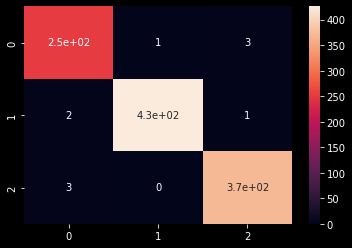

In [14]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
cross_val=cross_val_predict(model,X,Y,cv=3)
sns.heatmap(confusion_matrix(Y,cross_val),annot=True)

In [15]:
metrics.accuracy_score(prediction,y_test[1:212])

ValueError: Found input variables with inconsistent numbers of samples: [212, 211]